In [2]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

######################################################################
output size from the conv_layer :  (331, 499)
ker size :  (4, 4, 3)
stride :  (2, 2)
pad :  valid
######################################################################
output size from the conv_layer :  (331, 499)
ker size :  (4, 4, 3)
stride :  (2, 2)
pad :  valid
(331, 499, 2)
######################################################################
output size from the pool_layer :  (165, 249)
pool_window size :  (3, 3)
stride :  (2, 2)
######################################################################
output size from the pool_layer :  (165, 249)
pool_window size :  (3, 3)
stride :  (2, 2)
(165, 249, 2)
######################################################################
output size from the conv_layer :  (165, 249)
ker size :  (6, 6, 2)
stride :  (3, 3)
pad :  same
######################################################################
output size from the conv_layer :  (165, 249)
ker size :  (6, 6, 2)
strid

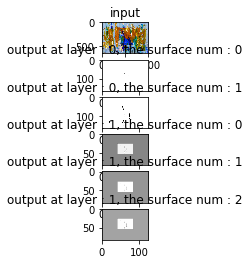

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def padding (img, dimx, dimy):
    dimx_zeros = dimx - img.shape[1]
    dimy_zeros = dimy - img.shape[0]
    dimx_left = int(dimx_zeros/2)
    dimx_right = dimx_zeros-dimx_left
    dimy_top = int(dimy_zeros/2)
    dimy_down = dimy_zeros-dimy_top

    img_out = np.zeros((dimy, dimx, img.shape[2]))
    img_out[dimy_top:dimy-dimy_down, dimx_left: dimx-dimx_right] = img

    return img_out



def corr2d (img, ker):
    return np.multiply(img, ker).sum()



def sigmoid(x):
    return 1/(1+np.exp(-x))

def nonlinear_func(img):
    return sigmoid(img)




def conv2d (input_img, ker, bias, nonlinear_func, stride=(1,1), pad='same'):
    img_out = []
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+ker.shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+ker.shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((input_img.shape[0], input_img.shape[1]))
    else:
        if((input_img.shape[0]-ker.shape[0])%stride[0]==0):
            dimy = input_img.shape[0]
        else:
            dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-ker.shape[0])%stride[0]
        if((input_img.shape[1]-ker.shape[1])%stride[1]==0):
            dimx = input_img.shape[1]
        else:
            dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-ker.shape[1])%stride[1]

        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((int((dimy-ker.shape[0])/stride[0])+1, (int((dimx-ker.shape[1])/stride[1])+1)))

    ker_rev = np.zeros([ker.shape[1], ker.shape[0], ker.shape[2]])

    for iter in range(ker.shape[0]):
        for iter2 in range(ker.shape[1]):
            ker_rev[ker.shape[1]-1-iter2, ker.shape[0]-1-iter] = ker[iter, iter2]

    ker_rev_y = ker_rev.shape[0]
    ker_rev_x = ker_rev.shape[1]
    for iter in range(int((dimy-ker_rev.shape[0])/stride[0]) +1):
        for iter2 in range(int((dimx-ker_rev.shape[1])/stride[1])+1 ):
            img_out[iter, iter2] =corr2d(img_padded[iter*stride[0]:iter*stride[0]+ker_rev_y, iter2*stride[1]:iter2*stride[1]+ker_rev_x], ker_rev)

    print("######################################################################")
    print("output size from the conv_layer : ", img_out.shape)
    print("ker size : ", ker.shape)
    print("stride : ", stride)
    print("pad : ", pad)
    return nonlinear_func(img_out+np.ones(img_out.shape)*bias)




def conv_layer(input_img, num_kernels, nonlinear_func, kernels, biases, stride = (1, 1), pad = 'same'):
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+kernels[0].shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+kernels[0].shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((input_img.shape[0], input_img.shape[1], num_kernels))
    else:
        if((input_img.shape[0]-kernels[0].shape[0])%stride[0]==0):
            dimy = input_img.shape[0]
        else:
            dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-kernels[0].shape[0])%stride[0]
        if((input_img.shape[1]-kernels[0].shape[1])%stride[1]==0):
            dimx = input_img.shape[1]
        else:
            dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-kernels[0].shape[1])%stride[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((int((dimy-kernels[0].shape[0])/stride[0])+1, (int((dimx-kernels[0].shape[1])/stride[1])+1), num_kernels))

    for iter in range(num_kernels):
        img_out[:, :, iter] = conv2d(input_img, kernels[iter], biases[iter], nonlinear_func, stride, pad)
    return img_out



def pool_func(img):
    return img.min()



def pooling(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
    if((input_img.shape[1]-pool_window[1])%stride[1]==0):
        dimx = input_img.shape[1]
    else:
        dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-pool_window[1])%stride[1]

    if((input_img.shape[0]-pool_window[0])%stride[0]==0):
        dimy = input_img.shape[0]
    else:
        dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-pool_window[0])%stride[0]
    input_pad = np.zeros((input_img.shape[0], input_img.shape[1], 1))
    input_pad[:, :, 0] = input_img
    input_img = padding(input_pad, dimx, dimy)
    img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1)))

    pool_window_x = pool_window[1]
    pool_window_y = pool_window[0]

    for iter in range(int((dimy-pool_window_y)/stride[0]) +1):
        for iter2 in range(int((dimx-pool_window_x)/stride[1])+1 ):
	    #print(iter)
	    #print(iter2)
            img_out[iter, iter2] =pool_func(input_img[iter*stride[0]:iter*stride[0]+pool_window_y, iter2*stride[1]:iter2*stride[1]+pool_window_x])
#     print(img_out.shape)
    print("######################################################################")
    print("output size from the pool_layer : ", img_out.shape)
    print("pool_window size : ", pool_window)
    print("stride : ", stride)
    return img_out


def pool_layer(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
    if((input_img.shape[1]-pool_window[1])%stride[1]==0):
        dimx = input_img.shape[1]
    else:
        dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-pool_window[1])%stride[1]

    if((input_img.shape[0]-pool_window[0])%stride[0]==0):
        dimy = input_img.shape[0]
    else:
        dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-pool_window[0])%stride[0]

    input_img = padding(input_img, dimx, dimy)

    img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1), input_img.shape[2]))
    for iter in range(input_img.shape[2]):
#         print(input_img.shape)
        img_out[:, :, iter] = pooling(input_img[:, :, iter], pool_func, pool_window, stride)
    return img_out


def conv_net(input_img, num_layers, ker_nums, kernels, biases, strides, paddings, nonlinear_funcs, pool_funcs, pool_windows, pool_strides):
    img_out = input_img
    current_ker_count = 0
    images = []
    for iter in range(num_layers):
        img_out = conv_layer(img_out, ker_nums[iter], nonlinear_funcs[iter], kernels[current_ker_count:current_ker_count+ker_nums[iter]], biases[current_ker_count:current_ker_count+ker_nums[iter]], strides[iter], paddings[iter] )
        current_ker_count = current_ker_count + ker_nums[iter]
        print(img_out.shape)
        img_out = pool_layer(img_out, pool_funcs[iter], pool_windows[iter], pool_strides[iter])
        print(img_out.shape)
        images.append(img_out)
    return images

img = cv2.imread('image.png')
num_layers = 2

ker_nums_layer1 = 2
ker_nums_layer2 = 3
ker_nums = []

ker_nums.append(ker_nums_layer1)
ker_nums.append(ker_nums_layer2)

kernels = []

kl1n1 = np.random.normal(size = (4, 4, 3))
kl1n2 = np.random.normal(size = (4, 4, 3))
kl1n2[2, 2, :] = 1

kernels.append(kl1n1/kl1n1.sum())
kernels.append(kl1n2/kl1n2.sum())

kl2n1 = np.random.normal(size = (6, 6, 2))
kl2n2 = np.ones((6, 6, 2))
kl2n3 = np.random.normal( size = (6, 6, 2))

kernels.append(kl2n1/kl2n1.sum())
kernels.append(kl2n2/kl2n2.sum())
kernels.append(kl2n3/kl2n3.sum())

kernels = np.array(kernels)

# print(kernels[3].shape)

stridel1 = (2, 2)
stridel2 = (3, 3)

strides = []
strides.append(stridel1)
strides.append(stridel2)

# print(strides)

paddingl1 = 'valid'
paddingl2 = 'same'

paddings = []
paddings.append(paddingl1)
paddings.append(paddingl2)

# print(paddings)

nonlinear_funcl1 = nonlinear_func
nonlinear_funcl2 = nonlinear_func

nonlinear_funcs = []
nonlinear_funcs.append(nonlinear_funcl1)
nonlinear_funcs.append(nonlinear_funcl2)

# print(nonlinear_funcs)

pool_funcl1 = pool_func
pool_funcl2 = pool_func

pool_funcs = []
pool_funcs.append(pool_funcl1)
pool_funcs.append(pool_funcl2)

# print(pool_funcs)

pool_windowl1 = (3, 3)
pool_windowl2 = (2, 2)

pool_windows = []
pool_windows.append(pool_windowl1)
pool_windows.append(pool_windowl2)

# print(pool_windows)

pool_stridel1 = (2, 2)
pool_stridel2 = (2, 2)

pool_strides = []
pool_strides.append(pool_stridel1)
pool_strides.append(pool_stridel2)

# print(pool_strides)

# biases = []

################################################################################
# shapey = 0
# shapex = 0
#
# for ker1 in kernels[0:ker_nums_layer1]:
#
#     shapey = 331
#     shapex = 499
#     bias = np.random.normal(size=(shapey, shapex))
# #     print(ker1.shape)
#     biases.append(bias)
#
# for ker1 in kernels[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1]:
#     shapey = 54
#     shapex = 82
#
#     bias = np.random.normal(size=(shapey, shapex))
#     print(ker1.shape)
#     biases.append(bias)
#
# for iter in range(np.array(biases).shape[0]):
#     print(biases[iter].shape)
################################################################################

biases = np.random.normal(size=(ker_nums_layer1+ker_nums_layer2))

img_out3 = conv_net(img, num_layers, ker_nums, kernels, biases, strides, paddings, nonlinear_funcs, pool_funcs, pool_windows, pool_strides)

count = 1
for iter in range(np.array(img_out3).shape[0]):
    for iter2 in range(img_out3[iter].shape[2]):
        count+=1

plt.subplot(count, 1, 1)
plt.imshow(img)
plt.title("input")
current_count = 1
for iter in range(np.array(img_out3).shape[0]):
    for iter2 in range(img_out3[iter].shape[2]):
        current_count+=1
        plt.subplot(count, 1, current_count)
        plt.imshow(img_out3[iter][:, :, iter2], cmap = 'gray')
        plt.title("output at layer : "+str(iter)+", the surface num : "+str(iter2))
plt.show()


In [2]:
# def corr2d (img, ker):
#     #print(img.shape)
#     return np.multiply(img, ker).sum()

# def nonlinear_func(img):
#     return img

# def softmax(x):
#     e_x = np.exp(x-np.max(x))
#     return e_x / e_x.sum()


In [4]:
# def conv2d (input_img, ker, nonlinear_func, stride=(1,1), pad='same'):
#     img_out = []
#     if pad =='same':
#         dimy = stride[0]*(input_img.shape[0]-1)+ker.shape[0]
#         dimx = stride[1]*(input_img.shape[1]-1)+ker.shape[1]
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((input_img.shape[0], input_img.shape[1]))
#     else:
#         if((input_img.shape[0]-ker.shape[0])%stride[0]==0):
#             dimy = input_img.shape[0]
#         else:
#             dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-ker.shape[0])%stride[0]
#         if((input_img.shape[1]-ker.shape[1])%stride[1]==0):
#             dimx = input_img.shape[1]
#         else:
#             dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-ker.shape[1])%stride[1]
        
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((int((dimy-ker.shape[0])/stride[0])+1, (int((dimx-ker.shape[1])/stride[1])+1)))

#     ker_rev = np.zeros([ker.shape[1], ker.shape[0], ker.shape[2]])
# #     print(ker_rev.shape)
# #     print(ker.shape)
#     for iter in range(ker.shape[0]):
#         for iter2 in range(ker.shape[1]):
#             ker_rev[ker.shape[1]-1-iter2, ker.shape[0]-1-iter] = ker[iter, iter2]

#     ker_rev_y = ker_rev.shape[0]
#     ker_rev_x = ker_rev.shape[1]
# #     print(ker_rev_y)
# #     print(ker_rev_x)
# #     print(img_padded.shape)
#     for iter in range(int((dimy-ker_rev.shape[0])/stride[0]) +1):
#         for iter2 in range(int((dimx-ker_rev.shape[1])/stride[1])+1 ):
# 	    #print(iter)
# 	    #print(iter2)
#             img_out[iter, iter2] =corr2d(img_padded[iter*stride[0]:iter*stride[0]+ker_rev_y, iter2*stride[1]:iter2*stride[1]+ker_rev_x], ker_rev)
# #     print(img_out.shape)
#     return nonlinear_func(img_out)

In [5]:
# def pool_func(img):
#     return img.min()

# def pooling(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
#     if((input_img.shape[1]-pool_window[1])%stride[1]==0):
#         dimx = input_img.shape[1]
#     else:
#         dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-pool_window[1])%stride[1]
    
#     if((input_img.shape[0]-pool_window[0])%stride[0]==0):
#         dimy = input_img.shape[0]
#     else:
#         dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-pool_window[0])%stride[0]
#     input_pad = np.zeros((input_img.shape[0], input_img.shape[1], 1))
#     input_pad[:, :, 0] = input_img
#     input_img = padding(input_pad, dimx, dimy)
#     img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1)))

#     pool_window_x = pool_window[1]
#     pool_window_y = pool_window[0]

#     for iter in range(int((dimy-pool_window_y)/stride[0]) +1):
#         for iter2 in range(int((dimx-pool_window_x)/stride[1])+1 ):
# 	    #print(iter)
# 	    #print(iter2)
#             img_out[iter, iter2] =pool_func(input_img[iter*stride[0]:iter*stride[0]+pool_window_y, iter2*stride[1]:iter2*stride[1]+pool_window_x])
# #     print(img_out.shape)
#     return img_out

In [6]:
# def conv_layer(input_img, num_kernels, nonlinear_func, kernels, stride = (1, 1), pad = 'same'):
#     if pad =='same':
#         dimy = stride[0]*(input_img.shape[0]-1)+kernels[0].shape[0]
#         dimx = stride[1]*(input_img.shape[1]-1)+kernels[0].shape[1]
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((input_img.shape[0], input_img.shape[1], num_kernels))
# #         print(img_out.shape)
#     else:
#         if((input_img.shape[0]-kernels[0].shape[0])%stride[0]==0):
#             dimy = input_img.shape[0]
#         else:
#             dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-kernels[0].shape[0])%stride[0]
#         if((input_img.shape[1]-kernels[0].shape[1])%stride[1]==0):
#             dimx = input_img.shape[1]
#         else:
#             dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-kernels[0].shape[1])%stride[1]
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((int((dimy-kernels[0].shape[0])/stride[0])+1, (int((dimx-kernels[0].shape[1])/stride[1])+1), num_kernels))
    
#     for iter in range(num_kernels):
# #         print(kernels.shape)
#         img_out[:, :, iter] = conv2d(input_img, kernels[iter], nonlinear_func, stride, pad)
# #     print(input_img.shape)
# #     print(img_out.shape)
# #     print(pad)
#     return img_out

In [7]:
# def pool_layer(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
#     if((input_img.shape[1]-pool_window[1])%stride[1]==0):
#         dimx = input_img.shape[1]
#     else:
#         dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-pool_window[1])%stride[1]
    
#     if((input_img.shape[0]-pool_window[0])%stride[0]==0):
#         dimy = input_img.shape[0]
#     else:
#         dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-pool_window[0])%stride[0]
    
#     input_img = padding(input_img, dimx, dimy)
    
#     img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1), input_img.shape[2]))
#     for iter in range(input_img.shape[2]):
# #         print(input_img.shape)
#         img_out[:, :, iter] = pooling(input_img[:, :, iter], pool_func, pool_window, stride)
#     return img_out

In [8]:
# def conv_net(input_img, num_layers, ker_nums, kernels, strides, paddings, nonlinear_funcs, pool_funcs, pool_windows, pool_strides):
#     img_out = input_img
#     current_ker_count = 0
#     for iter in range(num_layers):
#         img_out = conv_layer(img_out, ker_nums[iter], nonlinear_funcs[iter], kernels[current_ker_count:current_ker_count+ker_nums[iter]], strides[iter], paddings[iter] )
#         current_ker_count = current_ker_count + ker_nums[iter]
#         print(img_out.shape)
#         img_out = pool_layer(img_out, pool_funcs[iter], pool_windows[iter], pool_strides[iter])
#         print(img_out.shape)
#     return img_out


In [9]:
# ####Testing the conv_layer
# img = cv2.imread('image.png')
# ker1 = np.zeros((10, 10, 3))
# ker12 = np.ones((10, 10, 3))/30000
# ker1[5, 5, :] = 1
# # print(ker1)
# ker2 = []
# ker2.append(ker1)
# ker2.append(ker12)
# img_out1 = conv_layer(img, 2, nonlinear_func, np.array(ker2),  stride = (5, 5), pad = 'valid')
# print(img_out1.shape)
# img_out1 = pool_layer(img_out1, pool_func, pool_window=(2,2), stride = (2,2))
# # img_out1 = pooling(img_out1, pool_func, pool_window=(2,2), stride = (2,2))
# # img_out1 = conv2d(img, ker1*1000, nonlinear_func, stride = (5, 5), pad = 'valid')
# # plt.imshow(img_out1, cmap = 'gray')
# #img_out1 = padding(img, img.shape[1]+10, img.shape[0]+1000)
# # print(img_out1.shape[2])

# fig = plt.figure(figsize=(img_out1.shape[0], img_out1.shape[1]))  # width, height in inches

# for i in range(img_out1.shape[2]):
#     sub = fig.add_subplot(img_out1.shape[2], 1, i + 1)
#     sub.imshow(img_out1[:,:, i], cmap = 'gray', norm=None)

# plt.show()

In [26]:
# def unravel(input_img, weight):
#     input_row = np.matrix(input_img.flatten())
#     input_col = np.transpose(input_row)
# #     print(weight.shape)
#     prod = np.matmul(np.transpose(weight), input_col)
#     return prod

# def mlp(col_mat_in, num_layers, layer_sizes, weights, biases, activation_funcs):
#     prod_out = col_mat_in
#     for iter in range(num_layers):
# #         this_wt = weights[iter]
#         prod_out = activation_funcs[iter](np.matmul(np.transpose(weights[iter]), prod_out)+biases[iter])
#     return [softmax(prod_out), prod_out]


In [41]:
# img = cv2.imread('image.png')
# num_layers = 2

# ker_nums_layer1 = 2
# ker_nums_layer2 = 3
# ker_nums = []

# ker_nums.append(ker_nums_layer1)
# ker_nums.append(ker_nums_layer2)

# kernels = []

# kl1n1 = np.ones((4, 4, 3))
# kl1n2 = np.zeros((4, 4, 3))
# kl1n2[2, 2, :] = 1

# kernels.append(kl1n1/kl1n1.sum())
# kernels.append(kl1n2/kl1n2.sum())

# kl2n1 = np.random.randint(2, size = (6, 6, 2))
# kl2n2 = np.ones((6, 6, 2))
# kl2n3 = np.random.randint(10, size = (6, 6, 2))

# kernels.append(kl2n1/kl2n1.sum())
# kernels.append(kl2n2/kl2n2.sum())
# kernels.append(kl2n3/kl2n3.sum())

# kernels = np.array(kernels)

# # print(kernels[3].shape)

# stridel1 = (2, 2)
# stridel2 = (3, 3)

# strides = []
# strides.append(stridel1)
# strides.append(stridel2)

# # print(strides)

# paddingl1 = 'valid'
# paddingl2 = 'valid'

# paddings = []
# paddings.append(paddingl1)
# paddings.append(paddingl2)

# # print(paddings)

# nonlinear_funcl1 = nonlinear_func
# nonlinear_funcl2 = nonlinear_func

# nonlinear_funcs = []
# nonlinear_funcs.append(nonlinear_funcl1)
# nonlinear_funcs.append(nonlinear_funcl2)

# # print(nonlinear_funcs)

# pool_funcl1 = pool_func
# pool_funcl2 = pool_func

# pool_funcs = []
# pool_funcs.append(pool_funcl1) 
# pool_funcs.append(pool_funcl2) 

# # print(pool_funcs)

# pool_windowl1 = (3, 3)
# pool_windowl2 = (2, 2)

# pool_windows = []
# pool_windows.append(pool_windowl1)
# pool_windows.append(pool_windowl2)

# # print(pool_windows)

# pool_stridel1 = (2, 2)
# pool_stridel2 = (2, 2)

# pool_strides = []
# pool_strides.append(pool_stridel1)
# pool_strides.append(pool_stridel2)

# # print(pool_strides)

# img_out3 = conv_net(img, num_layers, ker_nums, kernels, strides, paddings, nonlinear_funcs, pool_funcs, pool_windows, pool_strides)
# temp = unravel(img_out3, np.random.rand(img_out3.size, 1024))
# num_layers = 2
# biases = []
# weights = []

# w1_mlp =  np.random.rand(temp.size, 512)
# w2_mlp =  np.random.rand(512, 10)

# b1_mlp = np.transpose(np.matrix(np.random.rand(512)))
# b2_mlp = np.transpose(np.matrix(np.random.rand(10)))

# layer_sizes = []
# layer_sizes.append(512)
# layer_sizes.append(10)

# biases.append(b1_mlp)
# biases.append(b2_mlp)

# weights.append(w1_mlp)
# weights.append(w2_mlp)

# activation_funcs = []
# activation_funcs.append(nonlinear_func)
# activation_funcs.append(nonlinear_func)

# # print(weights[0].dtype)

# output_mlp = mlp(temp, num_layers, layer_sizes, weights, biases, activation_funcs)
# print(output_mlp[1])

(331, 499, 2)
(165, 249, 2)
(54, 82, 3)
(27, 41, 3)
[[2.12664928e+10]
 [2.18375507e+10]
 [2.23077079e+10]
 [2.09862359e+10]
 [2.12576094e+10]
 [2.17002571e+10]
 [2.12350508e+10]
 [2.08553841e+10]
 [2.12742969e+10]
 [2.14457584e+10]]


In [4]:
np.ones((3,3))*3

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])